In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time as time
from matplotlib import style
import seaborn as sns

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "9ihdLuFUuxxECzaualLWgw5DW"
consumer_secret = "nKARLOqDPU1UpPzi9YOwKpr4YET3BwpJvq9rJU60czX4RJVIYY"
access_token = "20568408-UMkSqRe0mk2SiwzBhgegndARmYC51CAUpdycwNC3Q"
access_token_secret = "Cs3o6E1MPoUhb5gaW6XY28TjAGkZaqLVvzJXC9BLUtZ5Y"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Counter
counter = 1

# List for dictionaries of results
results_list = []
tweets_ago = []
username_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


# Loop through each user
for user in target_user:
    
    counter = 0

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])           
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # print(results)
            
            # Add each value to the appropriate list
            username_list.append(user)
            tweets_ago.append(counter)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            counter = counter + 1

# Create a dictionaty of results
user_results = {
    "Username": username_list,
    "Tweets Ago":tweets_ago,
    "Compound Score": compound_list,
    "Postive Score": positive_list,
    "Neutral Score": neutral_list,
    "Negative Score": negative_list
}

In [4]:
# Create DataFrame from Results List
results_df = pd.DataFrame(user_results).set_index("Username").round(3)
results_df.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Tweets Ago
Username,,,,,
@BBCWorld,0.000,0.000,1.000,0.000,0
@BBCWorld,-0.477,0.279,0.721,0.000,1
@BBCWorld,-0.440,0.293,0.707,0.000,2
@BBCWorld,0.000,0.000,1.000,0.000,3
@BBCWorld,0.000,0.323,0.354,0.323,4


In [5]:
# Create plot
x_vals = results_df["Tweets Ago"]
print(x_vals)

y_vals = results_df["Compound Score"]
print(y_vals)

Username
@BBCWorld     0
@BBCWorld     1
@BBCWorld     2
@BBCWorld     3
@BBCWorld     4
@BBCWorld     5
@BBCWorld     6
@BBCWorld     7
@BBCWorld     8
@BBCWorld     9
@BBCWorld    10
@BBCWorld    11
@BBCWorld    12
@BBCWorld    13
@BBCWorld    14
@BBCWorld    15
@BBCWorld    16
@BBCWorld    17
@BBCWorld    18
@BBCWorld    19
@BBCWorld    20
@BBCWorld    21
@BBCWorld    22
@BBCWorld    23
@BBCWorld    24
@BBCWorld    25
@BBCWorld    26
@BBCWorld    27
@BBCWorld    28
@BBCWorld    29
             ..
@nytimes     70
@nytimes     71
@nytimes     72
@nytimes     73
@nytimes     74
@nytimes     75
@nytimes     76
@nytimes     77
@nytimes     78
@nytimes     79
@nytimes     80
@nytimes     81
@nytimes     82
@nytimes     83
@nytimes     84
@nytimes     85
@nytimes     86
@nytimes     87
@nytimes     88
@nytimes     89
@nytimes     90
@nytimes     91
@nytimes     92
@nytimes     93
@nytimes     94
@nytimes     95
@nytimes     96
@nytimes     97
@nytimes     98
@nytimes     99
Name: Tweets Ag

Text(0,0.5,'Tweet Polarity')

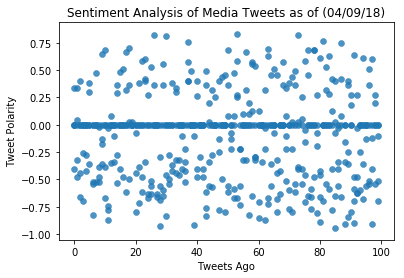

In [6]:
# Create scatter plot using matplotlib
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)
plt.title("Sentiment Analysis of Media Tweets as of (04/09/18)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

In [7]:
# Create bar chart using matplotlib
# Add some text for labels, title and custom x-axis tick labels, etc.
x_axis = np.arange(len(y_vals))

In [39]:
BBC_bar = np.mean(results_df.loc['@BBCWorld']["Compound Score"])
CBSNews_bar = np.mean(results_df.loc['@CBSNews']["Compound Score"])
CNN_bar = np.mean(results_df.loc['@CNN']["Compound Score"])
FoxNews_bar = np.mean(results_df.loc['@FoxNews']["Compound Score"])
NYTimes_bar = np.mean(results_df.loc['@nytimes']["Compound Score"])

<BarContainer object of 1 artists>

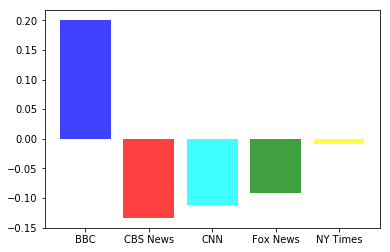

In [40]:
plt.bar('BBC',.2, facecolor = "blue", alpha=0.75, align="center")
plt.bar('CBS News', CBSNews_bar, facecolor = "red", alpha=0.75, align="center")
plt.bar('CNN', CNN_bar, facecolor = "cyan", alpha=0.75, align="center")
plt.bar('Fox News', FoxNews_bar, facecolor = "green", alpha=0.75, align="center")
plt.bar('NY Times', NYTimes_bar, facecolor = "yellow", alpha=0.75, align="center")

In [47]:
r = results_df.reset_index()

Text(-7.95,0.5,'Tweet Polarity')

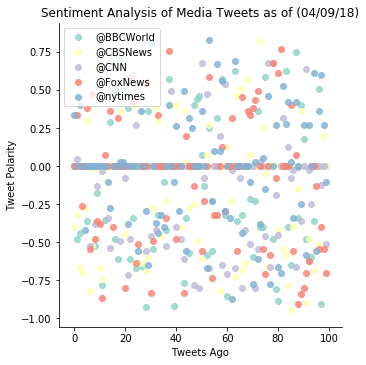

In [53]:
# library & dataset 
# --- Use the 'palette' argument of seaborn
sns.lmplot(x = "Tweets Ago", y = "Compound Score", data = r, hue = "Username", fit_reg=False, legend=False, palette="Set3")
plt.legend(loc='best')
plt.title("Sentiment Analysis of Media Tweets as of (04/09/18)")
plt.ylabel("Tweet Polarity")